In [1]:
import sys
import os
parent_dir = os.path.abspath('..')
sys.path.append(parent_dir)

In [2]:
from utils import *
from __init__ import b, c
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Estimate Adoption

In [3]:
time = np.arange(0, 34000, 1)
adoption = estimate_adoption(time, b, c)

In [4]:
# Adoption at December 10th, 2024
print(f'{estimate_adoption(5820, b, c)*100:.3}%')

0.357%


### Make Figures

In [5]:
# Convert days since inception into actual dates (for plotting purposes)
start_date = pd.to_datetime('2009-01-03')

# Generate date arrays for both actual and predicted data
time_actual = start_date + pd.to_timedelta(time, 'D')

#### Adoption Curve

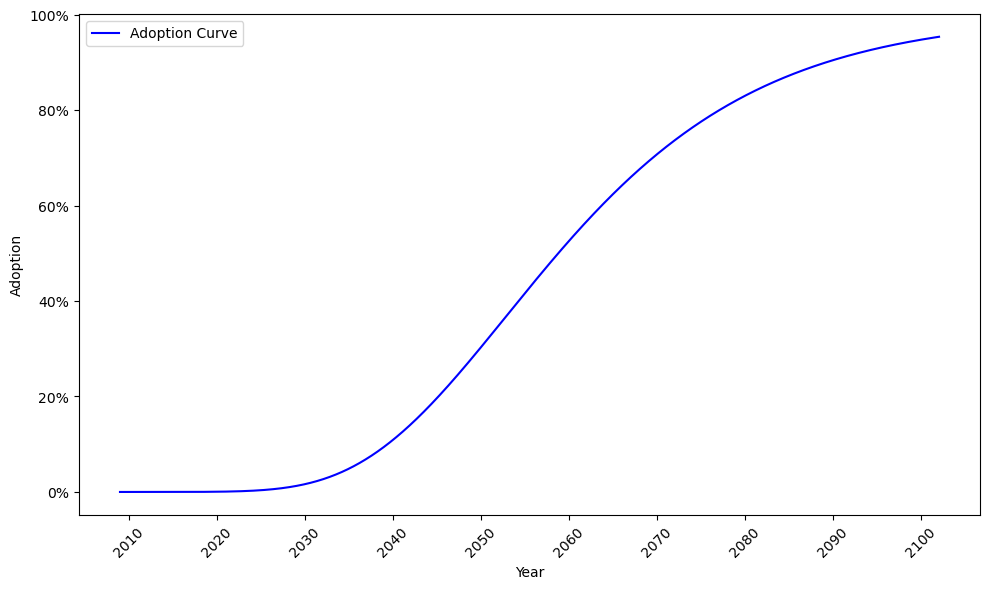

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(time_actual, adoption * 100, label='Adoption Curve', color='blue')
ax.set_xlabel('Year')
ax.set_ylabel('Adoption')
ax.legend()

ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))


plt.tight_layout()
plt.savefig('./adoption.png', dpi=400)

plt.show();